## Importing important modules and function to save figures

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Stochastic Gradient Descent Classifier and Random Forest Classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from scipy.stats import randint

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [13]:
param_grid_sgd = [{'max_iter': [1000, 5000, 10000],
               'tol': [1e-3],
              'alpha': [0.0001, 0.001, 0.01]}]

In [14]:
sgd_gridsearch = GridSearchCV(sgd_clf, param_grid_sgd, cv=3, scoring="accuracy")

sgd_gridsearch.fit(X_train, y_train_5)

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01],
                          'max_iter': [1000, 5000, 10000], 'tol': [0.001]}],
             scoring='accuracy')

In [15]:
sgd_gridsearch.best_params_

{'alpha': 0.001, 'max_iter': 1000, 'tol': 0.001}

In [16]:
sgd_gs = SGDClassifier(alpha=0.001, max_iter=1000,tol=0.001,random_state=42)

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_gs, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96545, 0.96315, 0.96485])

In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
y_train_pred = cross_val_predict(sgd_gs, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
roc_auc_score(y_train_5, y_train_pred)

0.8873531493313312

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53569,  1010],
       [ 1121,  4300]], dtype=int64)

In [24]:
precision_score(y_train_5, y_train_pred)

0.8097928436911488

In [25]:
recall_score(y_train_5, y_train_pred)

0.7932115845784911

In [26]:
f1_score(y_train_5, y_train_pred)

0.8014164569937564

In [27]:
from sklearn.ensemble import RandomForestClassifier

rforest_clf = RandomForestClassifier(random_state=42)

In [28]:
param_grid_rf = [{'bootstrap': [True], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}]

In [29]:
rf_gs = GridSearchCV(rforest_clf, param_grid_rf, cv=3, scoring='accuracy')

In [30]:
rf_gs.fit(X_train, y_train_5)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='accuracy')

In [31]:
rf_gs.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 30}

In [32]:
rf_gs = RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=30)

In [33]:
y_probas_rf = cross_val_predict(rf_gs, X_train, y_train_5, cv=3, method="predict_proba")

In [34]:
y_probas_rf

array([[0.3       , 0.7       ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       ...,
       [0.03333333, 0.96666667],
       [0.96666667, 0.03333333],
       [0.9       , 0.1       ]])

In [35]:
y_scores_rf = y_probas_rf[:, 1]

In [36]:
y_scores_rf

array([0.7       , 0.        , 0.16666667, ..., 0.96666667, 0.03333333,
       0.1       ])

In [37]:
roc_auc_score(y_train_5, y_scores_rf)

0.9975033541360934

In [38]:
y_train_pred_rf = cross_val_predict(rf_gs, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_rf)

0.9912849162011174

In [39]:
confusion_matrix(y_train_5, y_train_pred_rf)

array([[54540,    39],
       [  985,  4436]], dtype=int64)

In [40]:
recall_score(y_train_5, y_train_pred_rf)

0.8182992067884154

In [41]:
f1_score(y_train_5, y_train_pred_rf)

0.8965238480194018

## Training a K - Nearest Neighbor Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()

In [44]:
param_grid_knn = [{'n_neighbors': [5, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2],
                   'leaf_size': [30, 60]}]

In [45]:
knn_gs = GridSearchCV(knn_clf, param_grid_knn, cv=3, scoring='accuracy')

In [46]:
knn_gs.fit(X_train, y_multilabel)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [30, 60], 'n_neighbors': [5, 10],
                          'p': [1, 2], 'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [47]:
knn_gs.best_params_

{'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [48]:
knn_gs = KNeighborsClassifier(leaf_size=30, n_neighbors=5, p=2, weights='uniform' )

In [49]:
y_train_pred_knn = cross_val_predict(knn_gs, X_train, y_multilabel, cv=3)

In [50]:
y_train_pred_knn

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [51]:
y_train_pred_knn_sorted = y_train_pred_knn[:,1]

In [52]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [53]:
y_multilabel_sorted = y_multilabel[:,1]

In [54]:
roc_auc_score(y_multilabel_sorted, y_train_pred_knn_sorted)

0.9813676729635062

In [55]:
precision_score(y_multilabel_sorted, y_train_pred_knn_sorted)

0.9739175290969468

In [56]:
confusion_matrix(y_multilabel_sorted, y_train_pred_knn_sorted)

array([[28683,   809],
       [  300, 30208]], dtype=int64)

In [57]:
recall_score(y_multilabel_sorted, y_train_pred_knn_sorted)

0.9901665137013242

In [58]:
f1_score(y_multilabel_sorted, y_train_pred_knn_sorted, average="macro")

0.9815047185864341

### Storing all training score values

In [59]:
train_roc_auc_scores_all = [0.8874,0.9975,0.9814]
train_precision_scores_all = [0.8097,0.9913,0.9739]
train_recall_scores_all = [0.7932,0.8183,0.9902]
train_f1_scores_all = [0.8014,0.8965,0.9815]

### Prediction using test set

### For SGD

In [60]:
sgd_gs_test = SGDClassifier(alpha=0.001, max_iter=1000,tol=0.001,random_state=42)

In [61]:
sgd_gs_test.fit(X_train, y_train_5)

SGDClassifier(alpha=0.001, random_state=42)

In [62]:
y_test_pred_sgd = sgd_gs_test.predict(X_test)

In [63]:
roc_auc_score(y_test_5, y_test_pred_sgd)

0.7710375346366767

In [64]:
confusion_matrix(y_test_5, y_test_pred_sgd)

array([[9093,   15],
       [ 407,  485]], dtype=int64)

In [65]:
precision_score(y_test_5, y_test_pred_sgd)

0.97

In [66]:
recall_score(y_test_5, y_test_pred_sgd)

0.5437219730941704

In [67]:
f1_score(y_test_5, y_test_pred_sgd)

0.6968390804597699

### For Random Forest

In [68]:
rf_gs_test = RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=30)

In [69]:
rf_gs_test.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=False, max_features=8, n_estimators=30)

In [70]:
y_test_proba_rf = rf_gs_test.predict_proba(X_test)

In [71]:
y_test_pred_rf = rf_gs_test.predict(X_test)

In [72]:
y_test_pred_rf

array([False, False, False, ..., False,  True, False])

In [73]:
roc_auc_score(y_test_5, y_test_proba_rf[:,1])

0.998287367730729

In [74]:
confusion_matrix(y_test_5, y_test_pred_rf)

array([[9105,    3],
       [ 154,  738]], dtype=int64)

In [75]:
precision_score(y_test_5, y_test_pred_rf)

0.9959514170040485

In [76]:
recall_score(y_test_5, y_test_pred_rf)

0.827354260089686

In [77]:
f1_score(y_test_5, y_test_pred_rf)

0.9038579301898346

### For KNN

In [78]:
knn_gs_test = KNeighborsClassifier(leaf_size=30, n_neighbors=5, p=2, weights='uniform' )

In [79]:
y_test_large = (y_test >= 7)
y_test_odd = (y_test % 2 == 1)
y_test_multilabel = np.c_[y_test_large, y_test_odd]

In [80]:
y_test_multilabel

array([[ True,  True],
       [False, False],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [False, False]])

In [81]:
knn_gs_test.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [82]:
y_test_pred_knn = knn_gs_test.predict(X_test)

In [83]:
y_test_pred_knn

array([[ True,  True],
       [False, False],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [False, False]])

In [84]:
roc_auc_score(y_test_multilabel[:,1],y_test_pred_knn[:,1])

0.9851168199882502

In [85]:
confusion_matrix(y_test_multilabel[:,1],y_test_pred_knn[:,1])

array([[4825,  101],
       [  47, 5027]], dtype=int64)

In [86]:
precision_score(y_test_multilabel[:,1],y_test_pred_knn[:,1])

0.9803042121684867

In [87]:
recall_score(y_test_multilabel[:,1],y_test_pred_knn[:,1])

0.9907370910524241

In [88]:
f1_score(y_test_multilabel[:,1],y_test_pred_knn[:,1])

0.9854930405802784

### Storing all testing score values

In [89]:
test_roc_auc_scores_all = [0.7710,0.9983,0.9851]
test_precision_scores_all = [0.97,0.9959,0.9803]
test_recall_scores_all = [0.54,0.8273,0.9907]
test_f1_scores_all = [0.6968,0.9038,0.9855]

In [90]:
roc_auc_scores = [train_roc_auc_scores_all,test_roc_auc_scores_all]
precision_scores = [train_precision_scores_all,test_precision_scores_all]
recall_scores = [train_recall_scores_all,test_recall_scores_all]
f1_scores = [train_f1_scores_all,test_f1_scores_all]

### Plotting bar chart for all scores individually

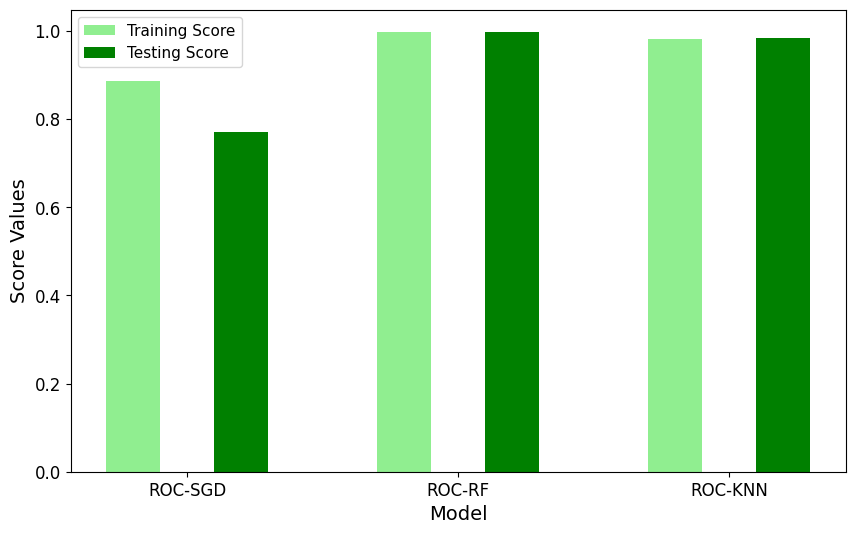

In [91]:
x = np.arange(3)
y1 = train_roc_auc_scores_all
y2 = test_roc_auc_scores_all

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x-0.2, y1, width, color='lightgreen') 
plt.bar(x+0.2, y2, width, color='green')
plt.xticks(x, ['ROC-SGD', 'ROC-RF', 'ROC-KNN']) 
plt.xlabel("Model") 
plt.ylabel("Score Values") 
plt.legend(["Training Score", "Testing Score"],loc="upper left",fontsize=11) 
plt.show() 

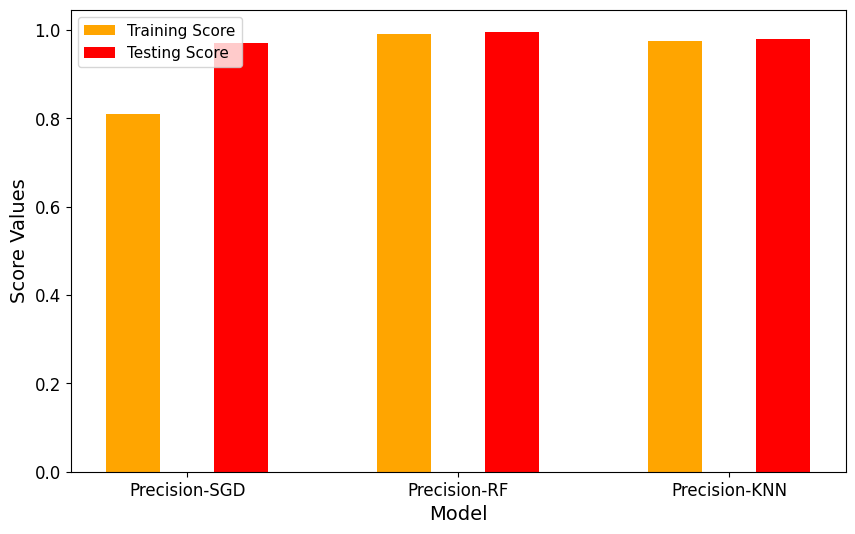

In [92]:
x = np.arange(3)
y1 = train_precision_scores_all
y2 = test_precision_scores_all

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x-0.2, y1, width, color='orange') 
plt.bar(x+0.2, y2, width, color='red')
plt.xticks(x, ['Precision-SGD', 'Precision-RF', 'Precision-KNN']) 
plt.xlabel("Model") 
plt.ylabel("Score Values") 
plt.legend(["Training Score", "Testing Score"],loc="upper left",fontsize=11) 
plt.show() 

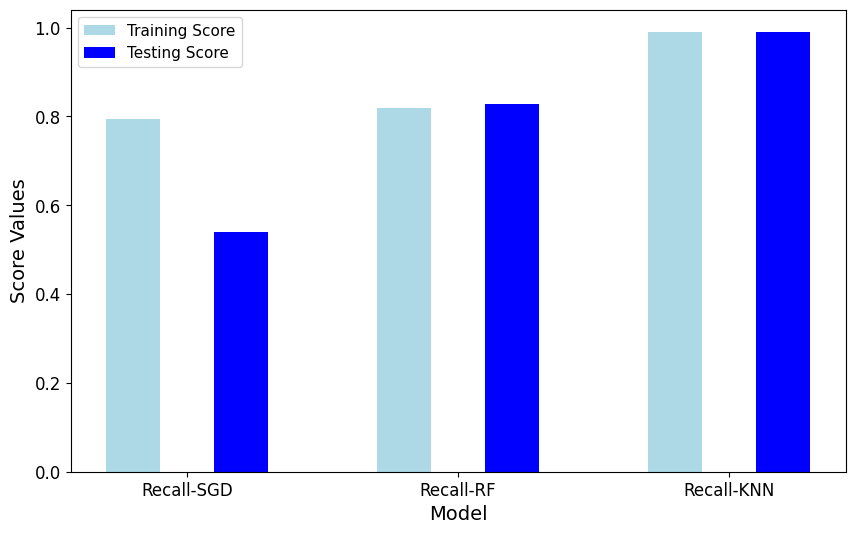

In [93]:
x = np.arange(3)
y1 = train_recall_scores_all
y2 = test_recall_scores_all

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x-0.2, y1, width, color='lightblue') 
plt.bar(x+0.2, y2, width, color='blue')
plt.xticks(x, ['Recall-SGD', 'Recall-RF', 'Recall-KNN']) 
plt.xlabel("Model") 
plt.ylabel("Score Values") 
plt.legend(["Training Score", "Testing Score"],loc="upper left",fontsize=11) 
plt.show() 

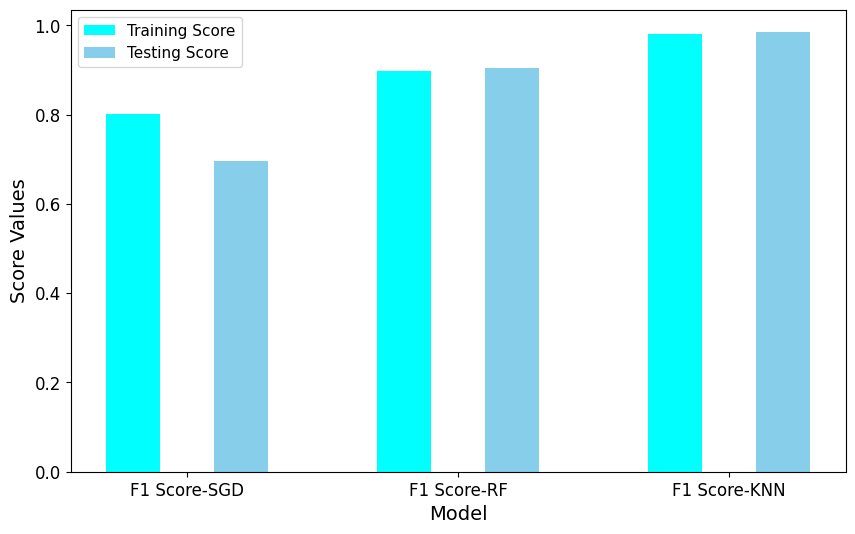

In [94]:
x = np.arange(3)
y1 = train_f1_scores_all
y2 = test_f1_scores_all

width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x-0.2, y1, width, color='aqua') 
plt.bar(x+0.2, y2, width, color='skyblue')
plt.xticks(x, ['F1 Score-SGD', 'F1 Score-RF', 'F1 Score-KNN']) 
plt.xlabel("Model") 
plt.ylabel("Score Values") 
plt.legend(["Training Score", "Testing Score"],loc="upper left",fontsize=11) 
plt.show() 

## Plotting Confusion Matrix

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

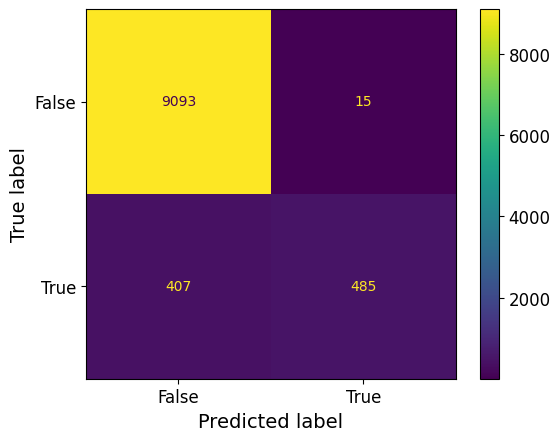

In [96]:
cm_sgd = confusion_matrix(y_test_5, y_test_pred_sgd)

disp_sgd = ConfusionMatrixDisplay(confusion_matrix=cm_sgd,display_labels=sgd_gs_test.classes_)

disp_sgd.plot()
plt.show()

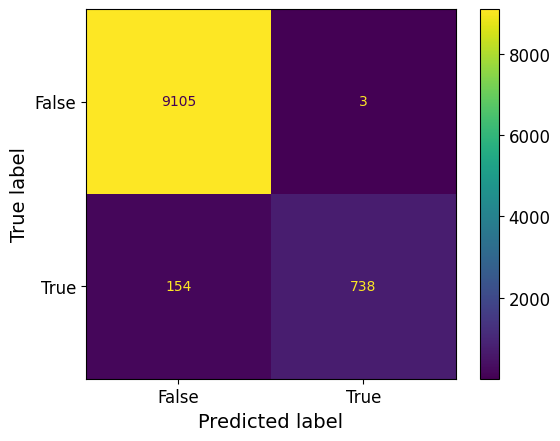

In [97]:
cm_rf = confusion_matrix(y_test_5, y_test_pred_rf)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf_gs_test.classes_)

disp_rf.plot()
plt.show()

c:\users\roy\pycharmprojects\pythonproject\venv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


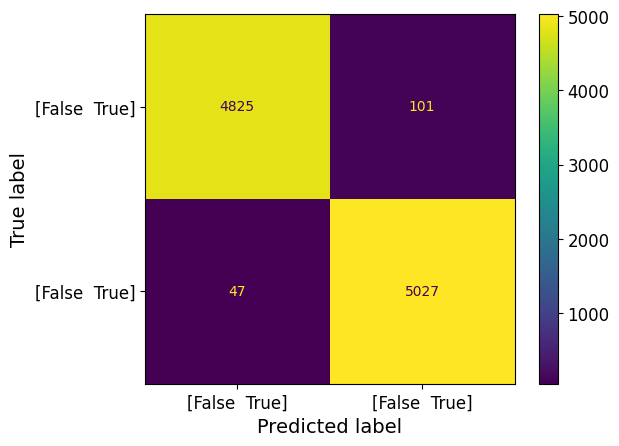

In [98]:
cm_knn = confusion_matrix(y_test_multilabel[:,1],y_test_pred_knn[:,1])

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn_gs_test.classes_)

disp_knn.plot()
plt.show()